In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/ORtg_combined_ratings.csv', index_col=0)

In [4]:
df.head()

,oORtg+_ytd,team_2,GP_ytd,oORtg+_f,GP_f,oORtg+_lastYear,GP,date,season_ytd,dORtg+_ytd,dORtg+_f,dORtg+_lastYear,nextDay_id,Lg,oORtg+_ros,dORtg+_ros
0,5.385517,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-29,2003,-7.285375,-5.047912,-3.85601,20021030SAC,87.870750,1.966514,-5.020289
1,-0.212275,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-30,2003,-20.786079,-5.047912,-3.85601,20021031SAC,96.288559,2.035622,-4.853614
2,-1.792378,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-10-31,2003,-24.971032,-5.047912,-3.85601,20021101SAC,96.517175,2.103223,-4.549834
3,30.303377,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-11-01,2003,-46.706502,-5.047912,-3.85601,20021102SAC,96.008131,1.300830,-4.006447
4,-2.641305,SAC2003,3,2.008209,82.0,4.14876,82.0,2002-11-02,2003,-11.757959,-5.047912,-3.85601,20021103SAC,97.422787,2.184773,-4.793100


In [5]:
df.shape

(74565, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74565 entries, 0 to 75065
Data columns (total 16 columns):
oORtg+_ytd         74565 non-null float64
team_2             74565 non-null object
GP_ytd             74565 non-null int64
oORtg+_f           74565 non-null float64
GP_f               74565 non-null float64
oORtg+_lastYear    74565 non-null float64
GP                 74565 non-null float64
date               74565 non-null object
season_ytd         74565 non-null int64
dORtg+_ytd         74565 non-null float64
dORtg+_f           74565 non-null float64
dORtg+_lastYear    74565 non-null float64
nextDay_id         74565 non-null object
Lg                 74565 non-null float64
oORtg+_ros         74565 non-null float64
dORtg+_ros         74565 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 9.7+ MB


In [7]:
sac03 = df[df.team_2=='SAC2003']

In [8]:
sac03.head()

,oORtg+_ytd,team_2,GP_ytd,oORtg+_f,GP_f,oORtg+_lastYear,GP,date,season_ytd,dORtg+_ytd,dORtg+_f,dORtg+_lastYear,nextDay_id,Lg,oORtg+_ros,dORtg+_ros
0,5.385517,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-29,2003,-7.285375,-5.047912,-3.85601,20021030SAC,87.870750,1.966514,-5.020289
1,-0.212275,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-30,2003,-20.786079,-5.047912,-3.85601,20021031SAC,96.288559,2.035622,-4.853614
2,-1.792378,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-10-31,2003,-24.971032,-5.047912,-3.85601,20021101SAC,96.517175,2.103223,-4.549834
3,30.303377,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-11-01,2003,-46.706502,-5.047912,-3.85601,20021102SAC,96.008131,1.300830,-4.006447
4,-2.641305,SAC2003,3,2.008209,82.0,4.14876,82.0,2002-11-02,2003,-11.757959,-5.047912,-3.85601,20021103SAC,97.422787,2.184773,-4.793100


In [9]:
sac03.team_2.unique()

array(['SAC2003'], dtype=object)

In [10]:
sac03.shape

(163, 16)

In [11]:
cols_to_keep = ['oORtg+_ytd', 'GP_ytd', 'GP_f', 'oORtg+_lastYear', 'oORtg+_ros']
sac03 = sac03[cols_to_keep]

In [12]:
sac03 = sac03.rename(columns={'oORtg+_ytd':'oortg_ytd', 'oORtg+_lastYear':'oortg_ly', 'oORtg+_ros':'oortg_ros'})

In [13]:
sac03.head()

,oortg_ytd,GP_ytd,GP_f,oortg_ly,oortg_ros
0,5.385517,1,82.0,4.14876,1.966514
1,-0.212275,1,82.0,4.14876,2.035622
2,-1.792378,2,82.0,4.14876,2.103223
3,30.303377,2,82.0,4.14876,1.300830
4,-2.641305,3,82.0,4.14876,2.184773


In [14]:
targ = sac03.oortg_ros
sac03.drop('oortg_ros', axis=1, inplace=True)

In [15]:
def mse(pred, targ): return (pred-targ).pow(2).mean()

In [16]:
def last_year(x): return x['oortg_ly']

In [17]:
ly = last_year(sac03)
mse(ly, targ)

3.884862893095265

In [18]:
def this_year(x): return x['oortg_ytd']

In [19]:
ty = this_year(sac03)
mse(ty, targ)

9.591817419353227

In [20]:
def weighted_avg(x, r=0.5):
    p = (x['GP_ytd']/x['GP_f'])
    return x['oortg_ytd']*p + x['oortg_ly']*(1-p)*r

In [21]:
wa = weighted_avg(sac03, r=1)
war = weighted_avg(sac03, r=0.5)
mse(wa, targ), mse(war, targ)

(1.536581655000369, 0.8136060619597383)

Regressing the last year's total does seem to help quite a bit in fact!

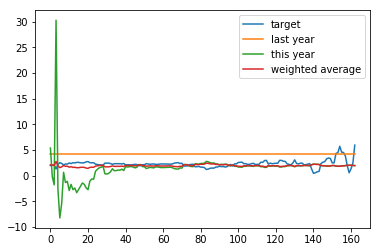

In [22]:
all_preds = pd.DataFrame({'target':targ, 'last year':ly, 'this year':ty, 'weighted average':war})
all_preds.plot()

"As I recall, our dependent variable was the team's end-of-season proportion of games won (as a deviation from 0.5).  Our predictor was a weighted average of two predictors -- a regression prediction based on the team's previous-season proportion of games won, and the team's current-season proportion of games won after n games.  We conjectured that an approximately optimal weight on the latter is the function W(n)=n(1+alpha/N)/(n+alpha) where N is the number of games in the full season and alpha is a positive parameter to be estimated.  Accordingly, the weight on the prediction from last year's record is 1-W(n)."

In [25]:
def w_ytd(n, a=10, N=82):
    return n * (1 + a/N) / (n + a)

In [26]:
for n in [0,1, 5, 10, 25, 40, 60, 82]: print(w_ytd(n))

0.0
0.10199556541019957
0.3739837398373984
0.5609756097560976
0.8013937282229966
0.8975609756097562
0.9616724738675959
1.0000000000000002


(0, 1)

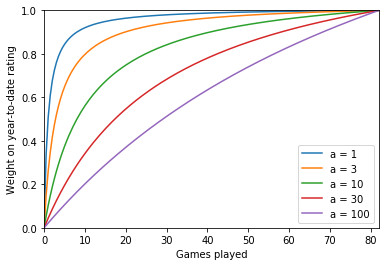

In [27]:
n = np.linspace(0,100,200)
w1 = w_ytd(n, a=1)
w3 = w_ytd(n, a=3)
w10 = w_ytd(n, a=10)
w30 = w_ytd(n, a=30)
w100 = w_ytd(n, a=100)

plt.plot(n, w1, label='a = 1')
plt.plot(n, w3, label='a = 3')
plt.plot(n, w10, label='a = 10')
plt.plot(n, w30, label='a = 30')
plt.plot(n, w100, label='a = 100')

plt.legend()
plt.xlabel("Games played")
plt.ylabel("Weight on year-to-date rating")
plt.xlim((0,82))
plt.ylim((0,1))

In [30]:
def fancy_wa(x, b=0.5):
    n = x['GP_ytd']
    w = w_ytd(n)
    return w * x['oortg_ytd'] + (1 - w) * x['oortg_ly'] * b

In [31]:
fwa = fancy_wa(sac03)
mse(fwa, targ)

1.9224257311040711

"Regression prediction based on the team's previous-season proportion of games won"

In [32]:
df_final = df[['team_2', 'oORtg+_f']].drop_duplicates()

In [33]:
df_final['team'] = df_final['team_2'].str[0:3]
df_final['year'] = df_final['team_2'].str[3:]
df_final.drop('team_2', axis=1, inplace=True)

In [34]:
df_final.head()

,oORtg+_f,team,year
0,2.008209,SAC,2003
164,1.842215,SAS,2003
328,1.353744,ORL,2003
492,1.118375,PHI,2003
656,3.690962,LAL,2003


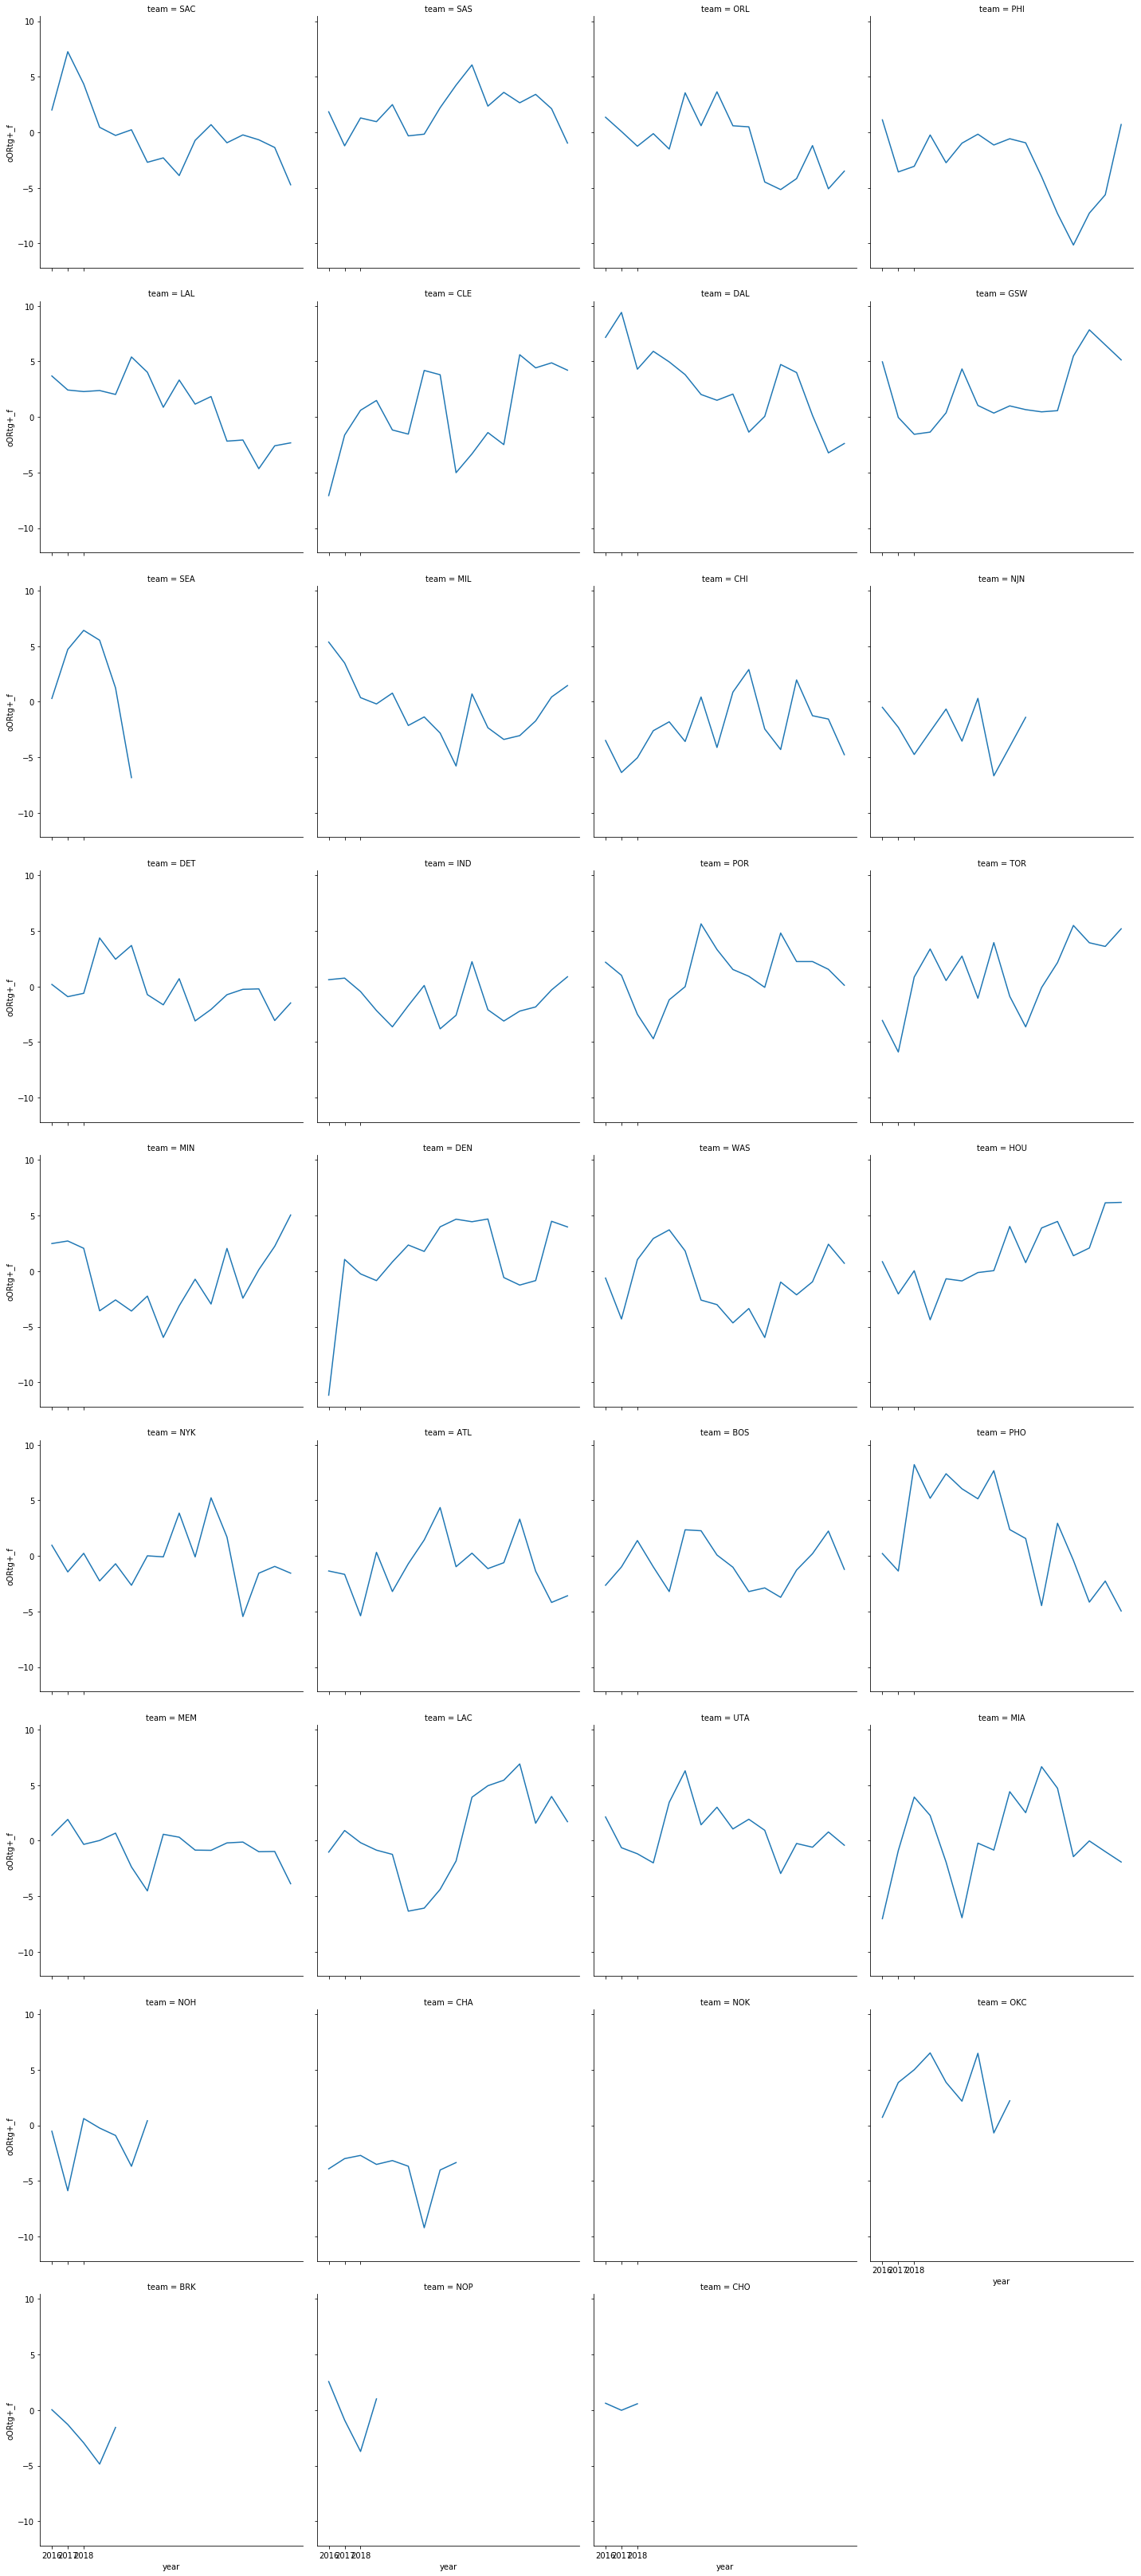

In [35]:
sns.relplot(x='year', y='oORtg+_f', col='team', col_wrap=4, kind='line', data=df_final)

In [36]:
df_final = df_final.set_index('year', drop=True)

In [37]:
sac = df_final[df_final['team']=='SAC']

In [38]:
sac.head()

,oORtg+_f,team
year,,
2003,2.008209,SAC
2004,7.250427,SAC
2005,4.344324,SAC
2006,0.450541,SAC
2007,-0.282696,SAC


In [39]:
def get_error(beta):
    team_error_list = []
    for team in df_final.team.unique():
        team_df = df_final[df_final['team']==team]
        errors = (beta * team_df['oORtg+_f'] - team_df['oORtg+_f'].shift()).dropna()
        team_error_list.append(errors)
    all_errors = pd.concat(team_error_list)
    error = all_errors.pow(2).mean()
    return error

In [40]:
for beta in np.linspace(0,1,11): print(f'beta: {beta} -> mse: {get_error(beta)}')

beta: 0.0 -> mse: 10.522211900607662
beta: 0.1 -> mse: 9.436651534863975
beta: 0.2 -> mse: 8.558420429990123
beta: 0.30000000000000004 -> mse: 7.887518585986109
beta: 0.4 -> mse: 7.42394600285194
beta: 0.5 -> mse: 7.167702680587614
beta: 0.6000000000000001 -> mse: 7.118788619193106
beta: 0.7000000000000001 -> mse: 7.277203818668459
beta: 0.8 -> mse: 7.642948279013651
beta: 0.9 -> mse: 8.21602200022868
beta: 1.0 -> mse: 8.99642498231354


In [41]:
df.head()

,oORtg+_ytd,team_2,GP_ytd,oORtg+_f,GP_f,oORtg+_lastYear,GP,date,season_ytd,dORtg+_ytd,dORtg+_f,dORtg+_lastYear,nextDay_id,Lg,oORtg+_ros,dORtg+_ros
0,5.385517,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-29,2003,-7.285375,-5.047912,-3.85601,20021030SAC,87.870750,1.966514,-5.020289
1,-0.212275,SAC2003,1,2.008209,82.0,4.14876,82.0,2002-10-30,2003,-20.786079,-5.047912,-3.85601,20021031SAC,96.288559,2.035622,-4.853614
2,-1.792378,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-10-31,2003,-24.971032,-5.047912,-3.85601,20021101SAC,96.517175,2.103223,-4.549834
3,30.303377,SAC2003,2,2.008209,82.0,4.14876,82.0,2002-11-01,2003,-46.706502,-5.047912,-3.85601,20021102SAC,96.008131,1.300830,-4.006447
4,-2.641305,SAC2003,3,2.008209,82.0,4.14876,82.0,2002-11-02,2003,-11.757959,-5.047912,-3.85601,20021103SAC,97.422787,2.184773,-4.793100


In [64]:
def test_on_all(function):
    errors = []
    for team in df['team_2'].unique():
        team_df = df[df['team_2']==team]
        team_df = team_df.rename(columns={'oORtg+_ytd':'oortg_ytd', 'oORtg+_lastYear':'oortg_ly', 'oORtg+_ros':'oortg_ros'})
        error = mse(function(team_df), team_df['oortg_ros'])
        errors.append(error)
    return np.mean(errors)

In [65]:
test_on_all(weighted_avg)

11.163352294692343

In [66]:
test_on_all(last_year)

16.005638627003222

In [67]:
test_on_all(this_year)

18.529654966879914

In [68]:
test_on_all(fancy_wa)

12.082999457369107